# TEST TWI OMP 

### Data description:

Multiple, labelled samples of pen tip trajectories recorded whilst writing individual characters. All samples are from the same writer, for the purposes of primitive extraction. Only characters with a single pen-down segment were considered.

Each character sample is a 3-dimensional pen tip velocity trajectory. This is contained in matrix format, with 3 rows and T columns where T is the length of the character sample.

The characters here were used for a PhD study on primitive extraction using HMM based models. The data consists of 2858 character samples, contained in the cell array 'mixout'. The struct variable 'consts' contains a field consts.charlabels which provides ennummerated labels for the characters. consts.key provides the key for each label. The data was captured using a WACOM tablet. 3 Dimensions were kept - x, y, and pen tip force. The data has been numerically differentiated and Gaussian smoothed, with a sigma value of 2. Data was captured at 200Hz. The data was normalised with consts.datanorm. Only characters with a single 'PEN-DOWN' segment were considered. Character segmentation was performed using a pen tip force cut-off point. The characters have also been shifted so that their velocity profiles best match the mean of the set.

## Download database

Run the cell below to collect the archives in your folder.

Safe cell that will create a folder `../trajectory_dataset` (), download and overwrite the files in this folder.

In [1]:
import os 
import requests

if not os.path.exists("../trajectory_dataset"):
    os.mkdir("../trajectory_dataset")
    r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat")
    open('../trajectory_dataset/mixoutALL_shifted.mat', 'wb').write(r.content)
    r = requests.get(" https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names")

    open('../trajectory_dataset/trajectories.names', 'wb').write(r.content)
# ! wget -O ../trajectory_dataset/mixoutALL_shifted.mat https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat
# ! wget -O ../trajectory_dataset/trajectories.names https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names

## Interacting with data

In [2]:
from scipy.io import loadmat
import numpy as np

# load data in a python dictionnary
mat = loadmat('../trajectory_dataset/mixoutALL_shifted.mat')

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'consts', 'mixout'])

In [3]:
# Information about the dataset

n_samples = mat["mixout"][0].__len__()

print(f"Number of samples:\t {n_samples}")


# Loading samples labels
keys = mat["consts"][0,0][4]
keys = [key - 1 for key in keys[0]]

labels = mat["consts"][0,0][3]
labels = np.array([label[0] for label in labels[0]])

samples_label = labels[[keys]]

label_unique, label_count = np.unique(samples_label, return_counts=True)

print()
print("Data distribution:")
print(f"{len(label_unique)} different class")
line_u = "_______" + str.join("_", ["___" for _ in label_count]) + "_"
print(line_u)
char = "|CHAR  | " + str.join(" | ", label_unique) + " |"
print(char)
line_d = "|______|" + str.join("|", ["___" for _ in label_count]) + "|"
print(line_d)
count = "|COUNT |" + str.join("|", [str(c) for c in label_count]) + "|"
print(count)
print(line_d)


samples = mat["mixout"][0]

f_s = 200 #Hz sampling at 200Hz

print(f"\n\nN_features: \t\t{samples[0].shape[0]} ---> \t(v_x, v_y, pen_tip_force)")
print(f"Sampling frequency: \t{f_s} Hz")


Number of samples:	 2858

Data distribution:
20 different class
_______________________________________________________________________________________
|CHAR  | a | b | c | d | e | g | h | l | m | n | o | p | q | r | s | u | v | w | y | z |
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|
|COUNT |171|141|142|157|186|138|127|174|125|130|141|131|124|119|133|131|155|125|137|171|
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|


N_features: 		3 ---> 	(v_x, v_y, pen_tip_force)
Sampling frequency: 	200 Hz


<ipython-input-3-d784a7ea64b0>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  samples_label = labels[[keys]]


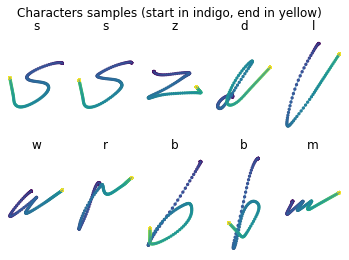

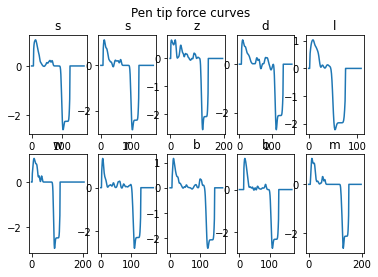

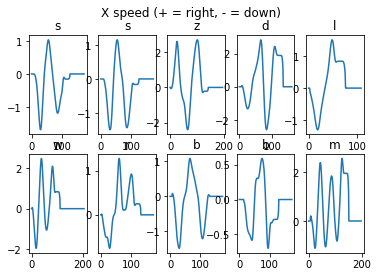

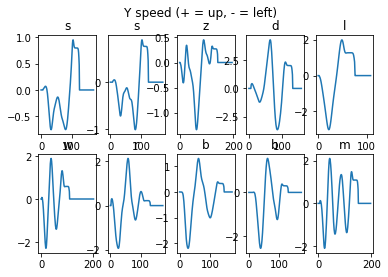

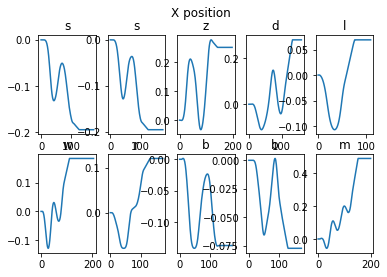

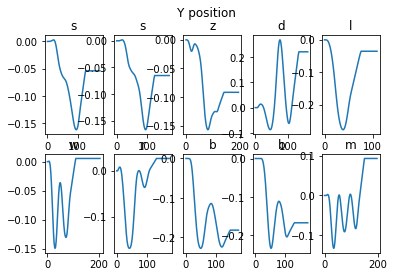

In [4]:
import matplotlib.pyplot as plt

rdm_sample_idx = np.random.randint(0, len(samples), 10)

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.scatter(x[:], y[:], c=np.arange(len(x)), s=5)

    # To modulate the linewidth depending on the pen tip force 
    # plt.scatter(x[1:], y[1:], c=np.arange(len(x[1:])), s=2*np.abs(pen_tip_f))
    
    plt.plot(x, y, alpha=0.5)
    
    plt.title(samples_label[i_sample])

    plt.axis('equal')
    plt.axis('off')
    #plt.colorbar()

plt.suptitle("Characters samples (start in indigo, end in yellow)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    pen_tip_f = exsample[2]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(pen_tip_f)), pen_tip_f)
    plt.title(samples_label[i_sample])

plt.suptitle("Pen tip force curves")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("X speed (+ = right, - = down)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    y_speed = exsample[1]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y_speed)), y_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("Y speed (+ = up, - = left)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x)), x)
    plt.title(samples_label[i_sample])

plt.suptitle("X position")
plt.show()


for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y)), y)
    plt.title(samples_label[i_sample])

plt.suptitle("Y position")
plt.show()

## TWI-kSVD on char-traj data

In [5]:
x_speeds = []
y_speeds = []
pen_tip_forces = []
max_len = 0
min_len = 1000

for sample in samples:
    x_speeds.append(sample[0])
    y_speeds.append(sample[1])
    pen_tip_forces.append(sample[2])
    
    if len(sample[0]) > max_len:
        max_len = len(sample[0])
    
    if len(sample[0]) < min_len:
        min_len = len(sample[0])


In [6]:
print(f"Longueur minimale : {min_len}")
print(f"Longueur maximale : {max_len}")

Longueur minimale : 109
Longueur maximale : 205


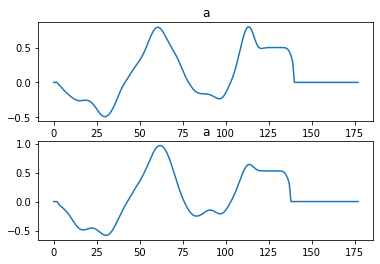

In [7]:
for i, x_speed in enumerate(x_speeds[:2]):

    plt.subplot(2, 1, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i])

In [8]:
samples_label.shape


(2858,)

In [9]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(np.arange(len(x_speeds)), test_size=0.4, stratify=samples_label)

x_train = [x_speeds[i][:109] for i in train_idx if samples_label[i] == 'a']
x_test = [x_speeds[i][:109]  for i in test_idx if samples_label[i] == 'a']

y_train = [y_speeds[i][:109]  for i in train_idx if samples_label[i] == 'a']
y_test = [y_speeds[i][:109]  for i in test_idx if samples_label[i] == 'a']

In [10]:
from twi_ksvd.ksvd import TWI_kSVD
from scipy import signal

# Au maximum 20 atomes pour décrire tous les signaux
K = 10
model_x = TWI_kSVD( K, max_iter=20)
# En décrivant chaque signal par au plus 5 atomes
tau = 2

D_list = []

dico_idx = np.random.choice(np.arange(len(x_train)), K)
for i in range(K):
    D_list.append(x_train[dico_idx[i]])

    # atom_length = 50  #(min_len + (i  * (max_len - min_len)) // (K-1)) // 4

    # phase = 2* np.pi * np.random.random(1)

    # window = signal.windows.hamming(atom_length)

    # window = window - np.min(window)
    
    # t = np.arange(atom_length) * np.random.random(1) / 5

    # D_list.append(np.cos(t+phase)*window)

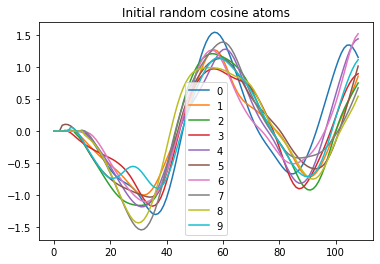

In [11]:
for i, atom in enumerate(D_list):

    plt.plot(np.arange(len(atom)), atom, label=f"{i}")

plt.title("Initial random cosine atoms")
plt.legend()
plt.show()
    

In [12]:
D_list

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.06994672, -0.11817171, -0.17825664,
        -0.24639426, -0.31898717, -0.39287319, -0.46504604, -0.53291436,
        -0.59480253, -0.64993185, -0.69787392, -0.73821193, -0.77102435,
        -0.79793229, -0.82268248, -0.85036955, -0.88553662, -0.93056439,
        -0.98541886, -1.04821915, -1.11548643, -1.18192494, -1.24039108,
        -1.28256997, -1.30037796, -1.28751848, -1.24042132, -1.15839579,
        -1.04337475, -0.89943639, -0.7320649 , -0.54725771, -0.35068962,
        -0.14731797,  0.05820372,  0.26100006,  0.4566447 ,  0.64255657,
         0.81808473,  0.98281761,  1.13476249,  1.26976026,  1.38226951,
         1.4670253 ,  1.52059429,  1.54183992,  1.53140584,  1.49123934,
         1.42463366,  1.33626711,  1.23166947,  1.11621794,  0.994189  ,
         0.86831822,  0.74009537,  0.61073695,  0.4

In [13]:
from twi_ksvd.omp import TWI_OMP

x = x_test[13]

alphas, deltas = TWI_OMP(x,D_list,1, r_window = 20)

In [14]:
reconstructed_x_signal = np.zeros_like(x_speeds[i])
for alpha, delta, atom in zip(alphas, deltas, D_list):
    if alpha != 0:
        reconstructed_x_signal += alpha * delta @ atom
        plt.plot(alpha * delta @ atom)

plt.plot(reconstructed_x_signal,label = "reconstructed")
# plt.subplot(4, 2, 5)
plt.plot(x, label="original")
plt.legend()

ValueError: operands could not be broadcast together with shapes (178,) (109,) (178,) 

TypeError: Invalid shape () for image data

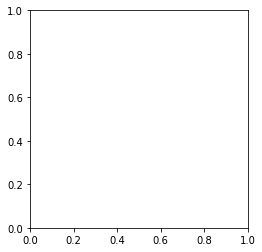

In [ ]:
plt.imshow(deltas[1])

In [ ]:
from twi_ksvd.ksvd import kSVD
model = kSVD()

model.fit(np.array(x_train),np.array(D_list),2)

iteration number : 0, eps : inf, delta_eps : inf
Compute Sparse Codes


ValueError: shapes (103,) and (10,) not aligned: 103 (dim 0) != 10 (dim 0)

In [15]:
from twi_ksvd.omp import TWI_OMP



In [38]:
from twi_ksvd.costw import COSTW
from tqdm import tqdm 
from time import time
Delta, Size, Delta2 = [], [],[]
for N in tqdm(np.logspace(1, 3, 10, dtype=int)):
    a = time()
    x = np.random.random(N)
    y = np.random.random(N)
    res = COSTW(x, y, r_window = None)
    delta = time( ) - a
    res = COSTW(x, y, r_window = 20)
    delta2 = time( ) - delta -a
    Delta2.append(delta2)
    Delta.append(delta)
    Size.append(N)

100%|██████████| 10/10 [01:11<00:00,  7.11s/it]


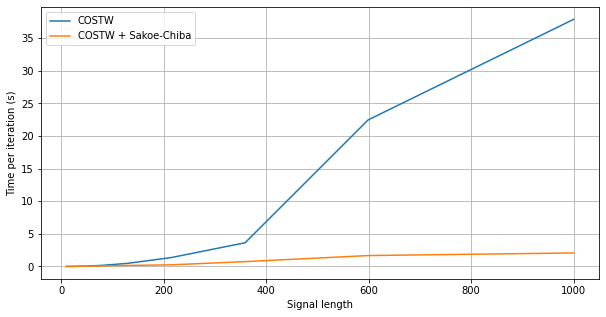

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(Size, Delta, label = "COSTW")
plt.plot(Size, Delta2, label = "COSTW + Sakoe-Chiba")
plt.legend()
plt.grid()
plt.xlabel("Signal length")
plt.ylabel("Time per iteration (s)")
plt.show()

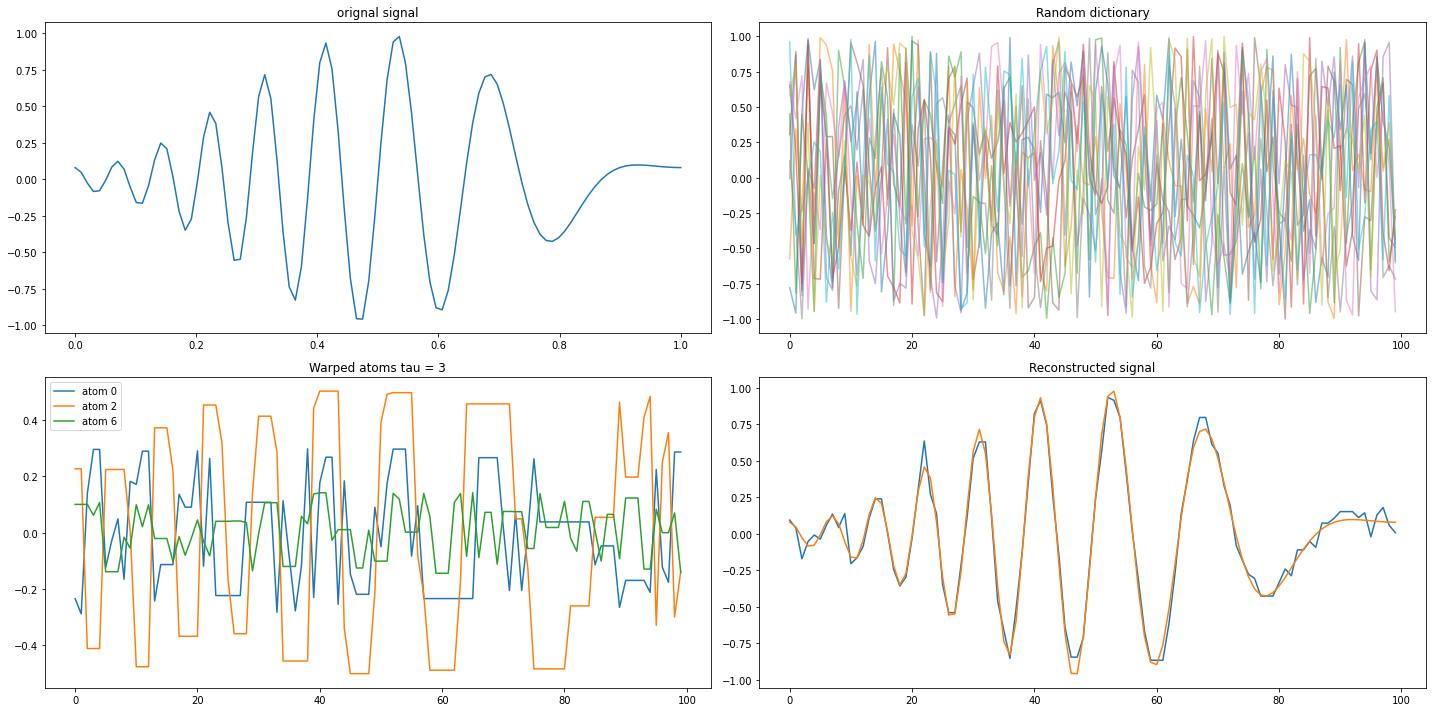

In [72]:
from twi_ksvd.omp import TWI_OMP
import scipy.signal as signal
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)

t = np.linspace(0, 1, 100)
x = signal.chirp(t, f0=15, f1=1,t1=1, method='linear')
x*= signal.hamming(100)
plt.plot(t,x)
plt.title("orignal signal")
plt.subplot(2,2,2)

# Random dictionary

D = [(np.random.random(100)-0.5)*2 for k in range(10)]
for d in D : 
    plt.plot(d, alpha= 0.5)
plt.title("Random dictionary")
plt.subplot(2,2,3)

reconstructed_x_signal = np.zeros_like(x)

alphas, deltas = TWI_OMP(x,D,3)
for k,(alpha, delta, atom)in enumerate(zip(alphas, deltas, D)):
    if alpha != 0:
        reconstructed_x_signal += alpha * delta @ atom
        plt.plot(alpha * delta @ atom, label = f"atom {k}")

plt.title("Warped atoms tau = 3")
plt.legend()
plt.subplot(2,2,4)
plt.plot(reconstructed_x_signal, label = "reconstructed tau = 3")
plt.plot(x, label="original")

plt.title("Reconstructed signal")
plt.tight_layout()

In [81]:
# Au maximum 20 atomes pour décrire tous les signaux
K = 10
model_x = TWI_kSVD( K, max_iter=20)
# En décrivant chaque signal par au plus 5 atomes
tau = 2

D_list = []

for i in range(K):
    atom_length = 100  #(min_len + (i  * (max_len - min_len)) // (K-1)) // 4

    phase = 2* np.pi * np.random.random(1)

    window = signal.windows.hamming(atom_length)

    window = window - np.min(window)
    
    t = np.arange(atom_length) * np.random.random(1) / 5

    D_list.append(np.cos(t+phase)*window)

c:\users\paple\documents\3a\mva\twi-ksvd\src\twi_ksvd\omp.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha_partial = lstsq(D_partial, x)[0]


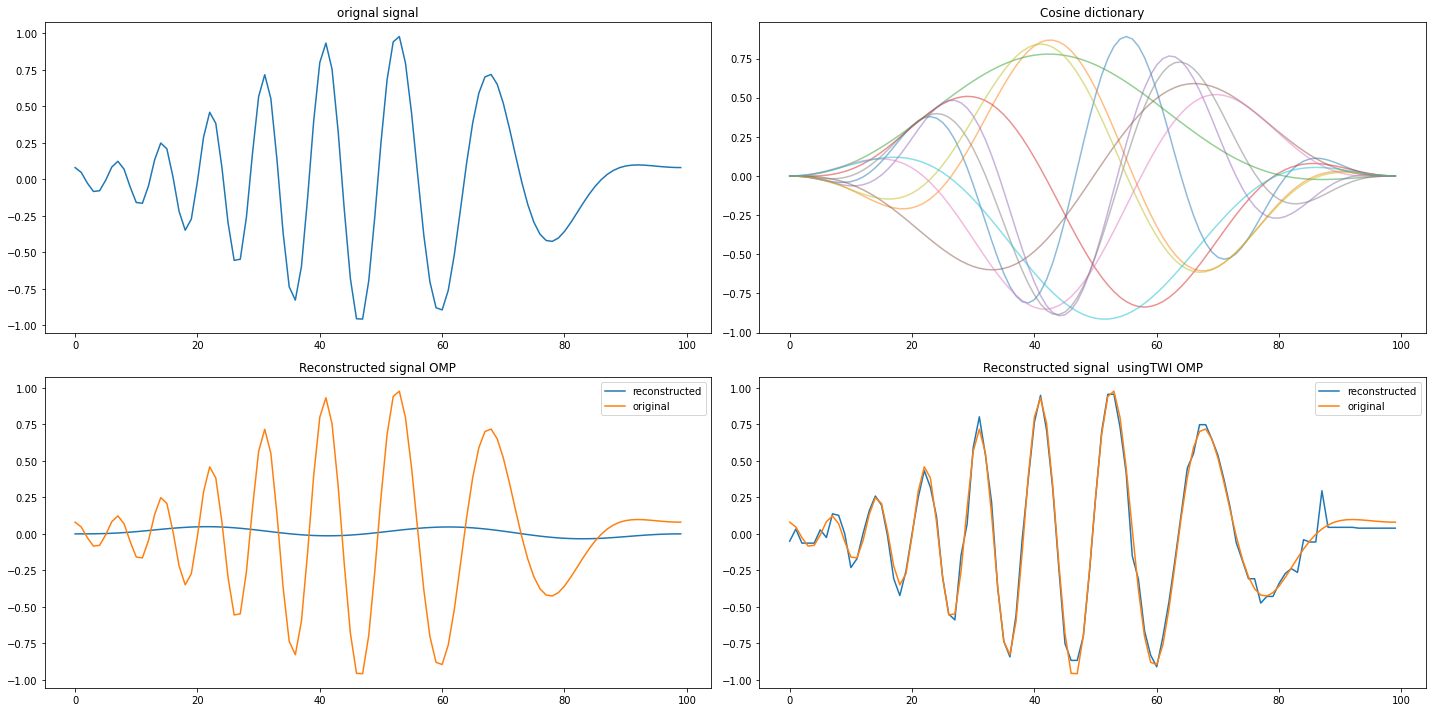

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(x)
plt.title("orignal signal")
plt.subplot(2,2,2)

# Random dictionary

D = [(np.random.random(100)-0.5)*2 for k in range(10)]
for d in D_list : 
    plt.plot(d, alpha= 0.5)
plt.title("Cosine dictionary")
plt.subplot(2,2,3)

alpha = OMP(x,np.array(D_list).T,5)

plt.plot(np.array(D_list).T@alpha, label  = "reconstructed")
plt.plot(x, label="original")


reconstructed_x_signal = np.zeros_like(x)

alphas, deltas = TWI_OMP(x,D,3)
for k,(alpha, delta, atom)in enumerate(zip(alphas, deltas, D)):
    if alpha != 0:
        reconstructed_x_signal += alpha * delta @ atom
        # plt.plot(alpha * delta @ atom, label = f"atom {k}")

plt.title("Reconstructed signal OMP")
plt.legend()
plt.subplot(2,2,4)
plt.plot(reconstructed_x_signal, label = "reconstructed")
plt.plot(x, label="original")

plt.title("Reconstructed signal  usingTWI OMP")
plt.legend()
plt.tight_layout()